# Modeling:
   We want to use the historical data from  cell'day data last year,such as 'START_TIME', 'GRANULARITY', 'ENODEB', 'CELL', 'UL_TRF', 'UU_TRF', 'RATE_RRC', 'RATE_ERAB' ..etc, to group the cells into different clusters identify the performance scenario for each cell, then after the scenario is identified, then we can apply specific network optimization according to different scenario!

# Data description

COLUMNS|DESCRIPTION| UNIT
------|------|---------  
START_TIME|  
GRANULARITY| MEASUREMENT UNIT | minitue
ENODEB |ENHANCE NODEB| 
CELL|
UL_TRF |UPLINK TRAFFIC OF UU (UE-Use Equipment) TO Utran) | MB
UU_TRF |DOWNLINK TRAFFIC OF UU | MB 
RATE_RRC | SUCCESS RATE FOR RRC CONNECTION | %
RATE_ERAB|SUCCESS RATE FOR ERAB SETUP | %
RATE_RADIO |SUCCESS RATE FOR RADIO ACCESS| % 
HO_INTRA| HANDOVER SUCCESS RATE FOR INTRA-ENODEB | %
HO_INTER |HANDOVER SUCCESS RATE FOR INTER-ENODEB | %
HO |HANDOVER SUCCESS RATE |%
DROP_RATE|CALL DROP RATE |%
RATE_CSFB,|CSFB SUCCESS RATE | %
UL_PRB_AVG_RATE| AVERAGE USE RATE FOR UPLINK PRB |%
DL_PRB_AVG_RATE|AVERAGE USE RATE FOR DOWNLINK PRB|%
MAX_USERS|TRAFIC MAXMUM USERS IN CELL |
UL_INTERFERENCE_AVG_PRB| average interference noise value on each uplink PRB subcarrier| db

# Load the data
Tasks:
1. import the module of numpy ,pandas,matplotlib
1. read the data from 'datasets/CELL_KPI_201711.csv'
2. show the first 5 rows of the data

In [1]:
# import the module of numpy ,pandas,matplotlib
# About 4 lines code:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data from 'datasets/CELL_KPI_201711.csv' and show the first 5 rows of the data
# About 2 lines code:
data = pd.read_csv('datasets/CELL_KPI_201711.csv',sep = ',',encoding='utf8')
data.head()

,START_TIME,GRANULARITY,ENODEB,CELL,UL_TRF,UU_TRF,RATE_RRC,RATE_ERAB,RATE_RADIO,HO_INTRA,HO_INTER,HO,DROP_RATE,RATE_CSFB,UL_PRB_AVG_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB
0,11/23/2017 09:00:00,15,EEIF,4485,23.341,43.276,99.673,100.000,99.673,89.583,100,92.248,0.342,100,NIL,5.640,13,-119
1,11/23/2017 09:00:00,15,GBHG,6176,9.435,69.750,100.000,100.000,100.000,100,100,100,0.000,100,NIL,6.992,27,-119
2,11/23/2017 09:00:00,15,GAGC,9092,11.973,180.969,99.810,99.878,99.688,100,NIL,100,0.000,100,NIL,8.338,30,-119
3,11/23/2017 09:00:00,15,EBIB,4181,68.619,655.644,99.960,99.928,99.888,98.967,97.406,98.077,0.134,97.619,NIL,56.424,184,-112
4,11/23/2017 09:00:00,15,HFBE,7514,33.052,346.267,100.000,100.000,100.000,98.585,98.958,98.634,0.137,100,NIL,25.609,114,-112


# Exploring the data 
Tasks:
1. show the columns of the data
2. show the size of the data
4. count the missing values in the dataset
3. calculate the basic statistics of the data
6. plot the data as a 3d figure with x-axis= UL_TRF,y=axis.UL_INTERFERENCE_AVG_PRB, z-axis =MAX_USERS

In [3]:
# show the columns of the data
# About 1 lines code:
print(data.columns)

# show the size of the data
# About 1 lines code:
print(data.shape)

# get the basic infomation of  the dataset
# About 1 lines code:
data.info()

Index(['START_TIME', 'GRANULARITY', 'ENODEB', 'CELL', 'UL_TRF', 'UU_TRF',
       'RATE_RRC', 'RATE_ERAB', 'RATE_RADIO', 'HO_INTRA', 'HO_INTER', 'HO',
       'DROP_RATE', 'RATE_CSFB', 'UL_PRB_AVG_RATE', 'DL_PRB_AVG_RATE',
       'MAX_USERS', 'UL_INTERFERENCE_AVG_PRB'],
      dtype='object')
(864, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 18 columns):
START_TIME                 864 non-null object
GRANULARITY                864 non-null int64
ENODEB                     864 non-null object
CELL                       864 non-null int64
UL_TRF                     864 non-null float64
UU_TRF                     864 non-null float64
RATE_RRC                   864 non-null float64
RATE_ERAB                  864 non-null float64
RATE_RADIO                 864 non-null float64
HO_INTRA                   864 non-null object
HO_INTER                   864 non-null object
HO                         864 non-null object
DROP_RATE                  

In [4]:
# Calculate the basic statistics of the data
# About 1 lines code:
data.describe()

,GRANULARITY,CELL,UL_TRF,UU_TRF,RATE_RRC,RATE_ERAB,RATE_RADIO,DROP_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB
count,864.0,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,15.0,5507.563657,34.569287,368.227076,99.881072,99.978699,99.859940,0.111292,25.797708,65.637731,-116.039352
std,0.0,2615.484455,32.317398,291.770876,0.270438,0.107920,0.337732,0.230544,22.059426,66.387217,3.314469
min,15.0,1020.000000,0.210000,0.185000,95.745000,98.201000,94.022000,0.000000,2.272000,7.000000,-120.000000
25%,15.0,3227.000000,9.040500,125.205250,99.835000,100.000000,99.825750,0.000000,8.412000,22.000000,-119.000000
50%,15.0,5539.500000,24.208000,309.358500,100.000000,100.000000,99.960000,0.000000,15.799000,40.000000,-117.500000
75%,15.0,7832.000000,50.489750,556.802750,100.000000,100.000000,100.000000,0.163000,40.952000,81.000000,-112.000000
max,15.0,9992.000000,177.250000,1828.730000,100.041000,100.000000,100.041000,2.690000,78.398000,407.000000,-110.000000


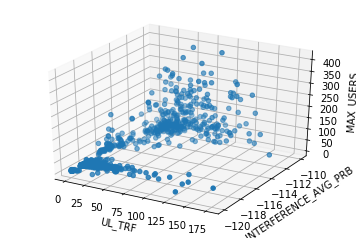

In [5]:
# plot the data as a 3d figure with x-axis= UL_TRF,y=axis.UL_INTERFERENCE_AVG_PRB, z-axis =MAX_USERS
# About 8 lines code:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter(data.UL_TRF,data.UL_INTERFERENCE_AVG_PRB,
                        data.MAX_USERS)
ax.set_xlabel('UL_TRF')
ax.set_ylabel('UL_INTERFERENCE_AVG_PRB')
ax.set_zlabel('MAX_USERS')
plt.show()

# Data Preprocessing
Tasks:  
1. select the columns of 'UL_TRF', 'UU_TRF', 'RATE_RRC', 'RATE_ERAB', 'RATE_RADIO', 'HO_INTRA', 'HO_INTER', 'HO', 'DROP_RATE', 'RATE_CSFB', 'UL_PRB_AVG_RATE', 'DL_PRB_AVG_RATE','MAX_USERS', 'UL_INTERFERENCE_AVG_PRB'  
2. show the dtypes of the selected data
3. tranform the data type into float
4. Dealing with Null values
3. concate the columns of 'UL_TRF'and 'UU_TRF' into a new column named 'TRAFFICE'
4. drop the old columns 'UL_TRF'and 'UU_TRF' and the  the first 5 rows of the new dataframe

Hint:
1. using the df.copy() method to copy a dataframe from the origianl datasets when Chained assignment,to escape SettingwithCopyWarning in pandas
2. using dataframe.applymap() method to apply a function on each element


In [6]:
# Select the columns  and show the data types
# About 2 lines code:
data_filter = data[['UL_TRF', 'UU_TRF', 'RATE_RRC', 'RATE_ERAB', 'RATE_RADIO', 'HO_INTRA', 
                'HO_INTER', 'HO', 'DROP_RATE', 'RATE_CSFB', 'UL_PRB_AVG_RATE', 'DL_PRB_AVG_RATE', 
                'MAX_USERS', 'UL_INTERFERENCE_AVG_PRB']].copy()

data_filter.dtypes

UL_TRF                     float64
UU_TRF                     float64
RATE_RRC                   float64
RATE_ERAB                  float64
RATE_RADIO                 float64
HO_INTRA                    object
HO_INTER                    object
HO                          object
DROP_RATE                  float64
RATE_CSFB                   object
UL_PRB_AVG_RATE             object
DL_PRB_AVG_RATE            float64
MAX_USERS                    int64
UL_INTERFERENCE_AVG_PRB      int64
dtype: object

In [7]:
# define a function to transform a number into float
# About 5 lines code:   
def tranform_to_float(number):
    try:
        return float(number)
    except Exception as e:
        return None
    
# tranform the data type into float and show the data types 
# About 2 lines code:    
df_trans = data_filter.applymap(tranform_to_float)
df_trans.dtypes

UL_TRF                     float64
UU_TRF                     float64
RATE_RRC                   float64
RATE_ERAB                  float64
RATE_RADIO                 float64
HO_INTRA                   float64
HO_INTER                   float64
HO                         float64
DROP_RATE                  float64
RATE_CSFB                  float64
UL_PRB_AVG_RATE             object
DL_PRB_AVG_RATE            float64
MAX_USERS                  float64
UL_INTERFERENCE_AVG_PRB    float64
dtype: object

## Dealing with Null values
1. show the basic infomation of the new dataframe
2. drop columns who have lots of missing values
3. imputer missing value 

In [8]:
# show the basic information of the new dataframe
# About 1 lines code:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 14 columns):
UL_TRF                     864 non-null float64
UU_TRF                     864 non-null float64
RATE_RRC                   864 non-null float64
RATE_ERAB                  864 non-null float64
RATE_RADIO                 864 non-null float64
HO_INTRA                   856 non-null float64
HO_INTER                   702 non-null float64
HO                         860 non-null float64
DROP_RATE                  864 non-null float64
RATE_CSFB                  759 non-null float64
UL_PRB_AVG_RATE            0 non-null object
DL_PRB_AVG_RATE            864 non-null float64
MAX_USERS                  864 non-null float64
UL_INTERFERENCE_AVG_PRB    864 non-null float64
dtypes: float64(13), object(1)
memory usage: 94.6+ KB


In [9]:
# drop columns who have lots of missing values and show the info again
# About 2 lines code:
df_trans.drop(columns=['HO_INTER','RATE_CSFB','UL_PRB_AVG_RATE'],inplace=True)
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 11 columns):
UL_TRF                     864 non-null float64
UU_TRF                     864 non-null float64
RATE_RRC                   864 non-null float64
RATE_ERAB                  864 non-null float64
RATE_RADIO                 864 non-null float64
HO_INTRA                   856 non-null float64
HO                         860 non-null float64
DROP_RATE                  864 non-null float64
DL_PRB_AVG_RATE            864 non-null float64
MAX_USERS                  864 non-null float64
UL_INTERFERENCE_AVG_PRB    864 non-null float64
dtypes: float64(11)
memory usage: 74.3 KB


In [10]:
# imputer missing value 
# About 5 lines code:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=0)
array_imp = imp.fit_transform(df_trans)
df_imp = pd.DataFrame(array_imp,columns=df_trans.columns)
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 11 columns):
UL_TRF                     864 non-null float64
UU_TRF                     864 non-null float64
RATE_RRC                   864 non-null float64
RATE_ERAB                  864 non-null float64
RATE_RADIO                 864 non-null float64
HO_INTRA                   864 non-null float64
HO                         864 non-null float64
DROP_RATE                  864 non-null float64
DL_PRB_AVG_RATE            864 non-null float64
MAX_USERS                  864 non-null float64
UL_INTERFERENCE_AVG_PRB    864 non-null float64
dtypes: float64(11)
memory usage: 74.3 KB


In [11]:
# Concate the columns of 'UL_TRF'and 'UU_TRF' into a new column named 'TRAFFICE' ,
# drop the old columns 'UL_TRF'and 'UU_TRF' and the  the first 5 rows of the new dataframe
# About 3 lines code:
df_imp['TRAFFIC'] = (df_imp.UL_TRF+ df_imp.UU_TRF)
df= df_imp.drop(columns=['UL_TRF','UU_TRF']).copy()
df.head()

,RATE_RRC,RATE_ERAB,RATE_RADIO,HO_INTRA,HO,DROP_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC
0,99.673,100.000,99.673,89.583,92.248,0.342,5.640,13.0,-119.0,66.617
1,100.000,100.000,100.000,100.000,100.000,0.000,6.992,27.0,-119.0,79.185
2,99.810,99.878,99.688,100.000,100.000,0.000,8.338,30.0,-119.0,192.942
3,99.960,99.928,99.888,98.967,98.077,0.134,56.424,184.0,-112.0,724.263
4,100.000,100.000,100.000,98.585,98.634,0.137,25.609,114.0,-112.0,379.319


### Standarization 
Tasks:  
1. Standardizing the new data
2. Prove your proceess of standization::mean =0,standard deviation =1  
Hint:     
using np.mean() and np.std() method to calculate the mean and standard diviation

In [12]:
#import the  StandardScaler() method from sklearn.preprocessing
# About 1 line code:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler()
# About 1 line code:
z_std = StandardScaler()

# fit and transfrom the original value of the new dataframe
# About 1 line code:
X_std = z_std.fit_transform(df.values)

In [13]:
# Prove your proceess of standization:mean =0,standard deviation =1
# About 2 line code:
print(np.mean(X_std,axis=0))

print(np.std(X_std,axis=0))

[-4.35454142e-14  1.50688104e-13 -2.31985213e-14  4.19417587e-16
  1.71056585e-15 -5.34551827e-17 -1.15134240e-16  2.87835599e-17
 -1.24591695e-15 -1.06910365e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Dimension reduction with PCA

In [14]:
# import PCA method from sklearn.decomposition
# About 1 line code:
from sklearn.decomposition import PCA

# Create a  instance of PCA,set n_components=3
# About 1 line code:
pca = PCA(n_components=3)

# fit and transfrom the data into low demision data
# About 1 line code:
X_pca = pca.fit_transform(X_std)

# create a new dataframe with columns=['pca_1','pca_2','pca_3'] and show the head of it 
# About 2 line code:
df_pca = pd.DataFrame(X_pca,columns=['pca_1','pca_2','pca_3'])
df_pca.head()

,pca_1,pca_2,pca_3
0,-1.337289,1.592485,1.334694
1,-1.767743,-0.331484,-0.689427
2,-1.285498,1.070381,-0.892020
3,2.490157,-0.644554,0.121255
4,0.780905,-0.816380,-0.034456


# Simple Modeling training with KMeans
Tasks:
1. Trainnig a KMeans estimator for the data with K=11
2. Using silhouette_score as metric to measuerment the clustering results
3. Plot the clusting results in a 3D figure  with x-axis= PCA_1,y=axis=PCA_2, z-axis =PCA_3

In [15]:
# import the KMeans method from sklearn.cluster
# import the silhouette_score from sklearn.metrics 
# About 2 line code:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Trainnig a KMeans estimator for the data with K=3 and Using silhouette_score as metric to measuerment the clustering results
# Create an instance of Kmeans estimator with K=3 and set radom_state =111
# About 1 line code:
simple_est = KMeans(n_clusters=3,random_state=111)

# fit the estitmator on the low dimesion data
# About 1 line code:
y_pred = simple_est.fit_predict(X_pca)

# mesure the clustring result with metric of silhouette_score
# About 1 line code:
score = silhouette_score(X_pca,y_pred)

# print the silhouette_score
# About 1 line code:
print('silhouette_score with k={0} is {1}'.format(11,score))

silhouette_score with k=11 is 0.5338045566063636


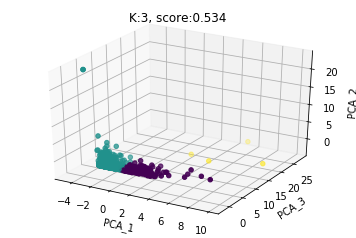

In [17]:
#  Plot the clusting results in a 3D figure with x-axis= PCA_1,y=axis=PCA_2, z-axis =PCA_3
# About 8 line code:
fig = plt.figure()
ax = plt.subplot(111,projection = '3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y_pred)
ax.set_xlabel('PCA_1')
ax.set_zlabel('PCA_2')
ax.set_ylabel('PCA_3')
plt.title('K:%d, score:%.03f'%(3,score))
plt.show()

# Tuning the parameter with KMeans: n_cluster of K
Tasks:
1. loopping the parameter:n_cluster of K from 2 to 13 and generate 12 estimators
2. mesuring the silhouette_score for each estimator
3. ploting 12 clustring results into a figure
3. store the silhouette_score corrsponding to K into a dictionary named d as {k：silhouette_score，...}
4. Plot the line plot,x-axis = k values, y-axis = silhouette_score in d to visulize which k has the best performace

silhouette_score with k=2 is 0.519144615065004
silhouette_score with k=3 is 0.5338045566063636
silhouette_score with k=4 is 0.5463093837009457
silhouette_score with k=5 is 0.5193129564063076
silhouette_score with k=6 is 0.4873010260600864
silhouette_score with k=7 is 0.42048270041577746
silhouette_score with k=8 is 0.42860786703171994
silhouette_score with k=9 is 0.4261464030175998
silhouette_score with k=10 is 0.43643956558549796
silhouette_score with k=11 is 0.36195933389183577
silhouette_score with k=12 is 0.3613877559299561
silhouette_score with k=13 is 0.33155994631969427


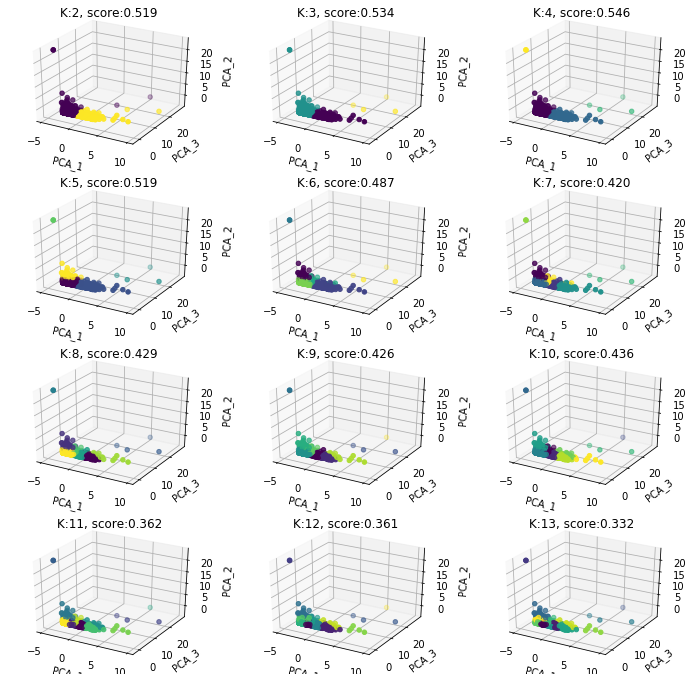

In [18]:
# Create a empty to store the silhouette_score corrsponding to K as {k：silhouette_score，...}
# About 1 line code:
d = {}

# Set the figure size as 12 inches by 12 inches
# About 1 line code:
fig = plt.figure(figsize= (12,12))

# Loop the parameter K from 2 to 13
# About 12 line code:
for k in range(2,14):
    est = KMeans(n_clusters=k,random_state=111)
    y_pred = est.fit_predict(X_pca)
    score = silhouette_score(X_pca,y_pred)  
    d.update({k:score})
    print('silhouette_score with k={0} is {1}'.format(k,score))
    ax= plt.subplot(4,3,k-1,projection = '3d')
    plt.title('K:%d, score:%.03f'%(k,score))
    ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y_pred)
    ax.set_xlabel('PCA_1')
    ax.set_zlabel('PCA_2')
    ax.set_ylabel('PCA_3')
plt.show()

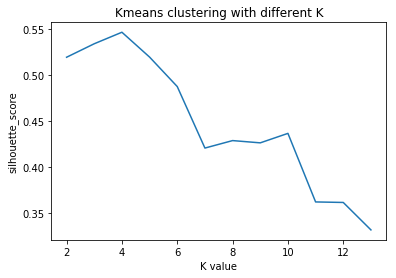

In [19]:
#  Plot the line plot,x-axis = k values, y-axis = silhouette_score in d to visulize which k has the best performace
# About 6 line code:
x= [k for k,score in d.items()]
y= [score for k,score in d.items()]

plt.plot(x,y)
plt.xlabel('K value')
plt.ylabel('silhouette_score')
plt.title('Kmeans clustering with different K')
plt.show()

In [20]:
# Trainnig a KMeans estimator for the data with K=4 and train again
# Create an instance of Kmeans estimator with K=4 and set radom_state =113
# About 1 line code:
best_est = KMeans(n_clusters=4,random_state=113)

# fit the estitmator on the low dimesion data
# About 1 line code:
y_pred = best_est.fit_predict(X_pca)

# mesure the clustring result with metric of silhouette_score
# About 1 line code:
score = silhouette_score(X_pca,y_pred)

# print the silhouette_score
# About 1 line code:
print('silhouette_score with k={0} is {1}'.format(4,score))

silhouette_score with k=4 is 0.5463093837009457


# Trainning the data with DBSCAN

In [21]:
# define a plot funtion for clustering
def plot_cluters(estimator,**kw):
    '''
    Output:
    Plot the clusting results in a 3D figure with x-axis= PCA_1,y=axis=PCA_2, z-axis =PCA_3
    title('Score:%.03f,Pamameter:%s,Clusters:%d'%(score,str(kw),clusters))
    Input: 
    estimator: the clustering estimator
    **kw: paramters and corresponding values    
    '''
    # About 11 line code:
    y_pred = estimator.fit_predict(X_pca)
    clusters = len(set(estimator.labels_))
    score = silhouette_score(X_pca,y_pred)
    
    fig = plt.figure()
    ax = plt.subplot(111,projection = '3d')
    ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=y_pred)
    ax.set_xlabel('PCA_1')
    ax.set_zlabel('PCA_2')
    ax.set_ylabel('PCA_3')
    plt.title('Score:%.03f,Pamameter:%s,Clusters:%d'%(score,str(kw),clusters))
    plt.show()

### Training a simple DBSCAN clustering

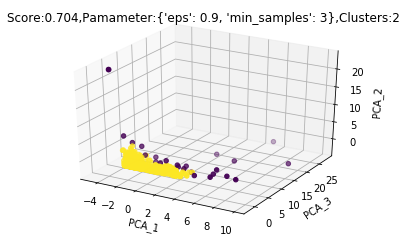

In [22]:
# import DBSCAN from sklearn.cluster 
from sklearn.cluster import DBSCAN

# create an instance of DBSCAN with eps= 0.9,min_samples= 3
dbscan = DBSCAN(eps= 0.9,min_samples= 3)

# predict the clusters for each sample
y_pred = estimator.fit_predict(X_pca)

# plot the estimator result
plot_cluters(dbscan,eps= 0.9,min_samples= 3)

### Tuning the parameter of DBSCAN

In [23]:
#create a empty dictionary to store the results for different parameters as {parameter:score}
#create a empty dictionary of d_dbscan
d_dbscan = {}
# for parameter of eps, loop from 0.1 to 0.9 stepped by 0.1:
for eps in np.linspace(0.1,0.9,9):
    # for parameter of min_samples, loop from 2 to 15:
    for min_samples in range(2,15):
        # create a DBSCAN instance , then fit and predict on data 
        # with three principle compenents: X_pca 
        y_pred = DBSCAN(eps,min_samples).fit_predict(X_pca)
        #calculate the silhouette_score
        score  = silhouette_score(X_pca, y_pred)
        # update the d_dbscan  with 
       # key = {'eps':eps,'min_samples':min_samples} and value = score
        key = {'eps':eps,'min_samples':min_samples}
        d_dbscan[str(key)] = score
        #print the result with parameters of eps and min_samples
        print( "silhouette_score with eps=", eps, "min_samples=", min_samples,
              "score:",score)

silhouette_score with eps= 0.1 min_samples= 2 score: -0.3273515073296113
silhouette_score with eps= 0.1 min_samples= 3 score: -0.40764362269362703
silhouette_score with eps= 0.1 min_samples= 4 score: -0.44329501957011186
silhouette_score with eps= 0.1 min_samples= 5 score: -0.39529133087159773
silhouette_score with eps= 0.1 min_samples= 6 score: -0.2678560618871155
silhouette_score with eps= 0.1 min_samples= 7 score: -0.2201529826926879
silhouette_score with eps= 0.1 min_samples= 8 score: -0.1458783080961061
silhouette_score with eps= 0.1 min_samples= 9 score: -0.14641550363878167
silhouette_score with eps= 0.1 min_samples= 10 score: 0.04668708573574727
silhouette_score with eps= 0.1 min_samples= 11 score: -0.13859568347591644
silhouette_score with eps= 0.1 min_samples= 12 score: -0.1475890965000584
silhouette_score with eps= 0.1 min_samples= 13 score: 0.036994609642514546
silhouette_score with eps= 0.1 min_samples= 14 score: 0.03193402315294415
silhouette_score with eps= 0.2 min_sampl

silhouette_score with eps= 0.9 min_samples= 5 score: 0.6714753635566287
silhouette_score with eps= 0.9 min_samples= 6 score: 0.6613725618576544
silhouette_score with eps= 0.9 min_samples= 7 score: 0.6513145190568298
silhouette_score with eps= 0.9 min_samples= 8 score: 0.6513145190568298
silhouette_score with eps= 0.9 min_samples= 9 score: 0.6462183214870488
silhouette_score with eps= 0.9 min_samples= 10 score: 0.6384908786472828
silhouette_score with eps= 0.9 min_samples= 11 score: 0.6384908786472828
silhouette_score with eps= 0.9 min_samples= 12 score: 0.6384908786472828
silhouette_score with eps= 0.9 min_samples= 13 score: 0.6341272904002638
silhouette_score with eps= 0.9 min_samples= 14 score: 0.6341272904002638


In [24]:
# Find the best score and the corresponding paramters
# Hint: using max() method on d_dbscan.values() to find the best score in d_dbscan
best_score  = max(d_dbscan.values())

# Hint: using max() method on d_dbscan to find the cressponding to the best score in d_dbscan with  key=d_dbscan.get
key = max(d_dbscan, key=d_dbscan.get)
# print the best score and the corresponding paramters
print('The DBSCAN has the best score:{0} with parmates:{1}'.format(best_score,key))

The DBSCAN has the best score:0.7035181933070808 with parmates:{'eps': 0.9, 'min_samples': 3}


# Trainning the data with Spectral Clustering

### Training a simple SpectralClustering

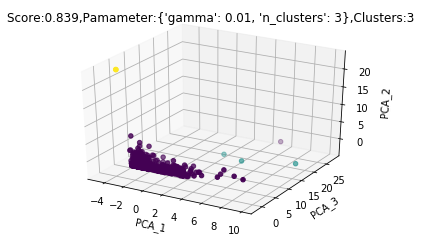

In [25]:
# from sklearn.cluster import SpectralClustering
from sklearn.cluster import SpectralClustering

# create an instance of SpectralClustering with parameters of 
# gamma= 0.01,n_clusters= 3
Spectral = SpectralClustering(gamma= 0.01,n_clusters= 3 )

# plot the estimator result by the fuction of plot_cluters
plot_cluters(Spectral,gamma= 0.01,n_clusters= 3)

### Tuning the parameter of SpectralClustering

In [26]:
#create a dictionary to store the results for different parameters as {parameter:score}
#create a empty dictionary of d_Spectral
d_Spectral = {}
# for parameter of gamma, loop from [0.01,0.1,1,5]:
for gamma in [0.01,0.1,1,5]:
    # for parameter of n_clusters, loop from [3,4,5,6]:
    for k in [3,4,5,6]:
        # create a SpectralClustering instance , then fit and predict on 
        # data with three principle compenents: X_pca 
        y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X_pca)
        #calculate the silhouette_score
        score  = silhouette_score(X_pca, y_pred)
        # update the d_Spectral with  key = {'gamma':gamma,'k':k} and value = score
        key = {'gamma':gamma,'k':k}
        d_Spectral[str(key)] = score
        #print the result with parameters of eps and min_samples
        print( "silhouette_score with gamma=", gamma, "k=", k,"score:",score)

silhouette_score with gamma= 0.01 k= 3 score: 0.8387031592703414
silhouette_score with gamma= 0.01 k= 4 score: 0.4079937069127612
silhouette_score with gamma= 0.01 k= 5 score: 0.3086456529976585
silhouette_score with gamma= 0.01 k= 6 score: 0.3812067262461588
silhouette_score with gamma= 0.1 k= 3 score: 0.3031151392035638
silhouette_score with gamma= 0.1 k= 4 score: 0.3666719712954447
silhouette_score with gamma= 0.1 k= 5 score: 0.37323286911316794
silhouette_score with gamma= 0.1 k= 6 score: 0.32870966904491355
silhouette_score with gamma= 1 k= 3 score: 0.1515848036394574
silhouette_score with gamma= 1 k= 4 score: 0.2250085067222208
silhouette_score with gamma= 1 k= 5 score: 0.1300966003680682
silhouette_score with gamma= 1 k= 6 score: 0.172441442123579


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


silhouette_score with gamma= 5 k= 3 score: -0.03308525489627722
silhouette_score with gamma= 5 k= 4 score: 0.030879040099204554
silhouette_score with gamma= 5 k= 5 score: 0.06153243556748419
silhouette_score with gamma= 5 k= 6 score: -0.0767628251208807


In [29]:
# Find the best score and the corresponding paramters
# About 3 line code:
# Hint: using max() method on d_Spectral.values() to find the best score in d_dbscan
best_score  = max(d_Spectral.values())


# Hint: using max() method on d_Spectral to find the cressponding to the best score in d_Spectral with key= d_Spectral.get
key = max(d_Spectral, key=d_Spectral.get)
#print the best score and the corresponding paramters
print('The Spectral Clustering has the best score:{0} with parmates:{1}'.format(best_score,key))

The Spectral Clustering has the best score:0.8387031592703414 with parmates:{'gamma': 0.01, 'k': 3}


## Traing with the best model again

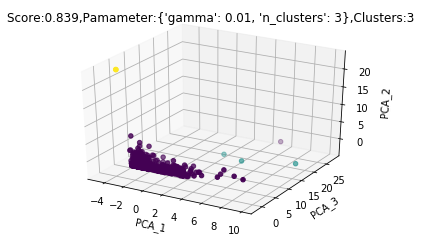

In [30]:
# create an instance from the best model above, which is a SpectralClustering with parameters = {'gamma': 0.01, 'k': 3}
best_est = SpectralClustering(gamma= 0.01,n_clusters= 3 )

# fit and predict on X_pca
y_pred = best_est.fit_predict(X_pca)

#plot the model by function of plot_cluters
plot_cluters(best_est,gamma= 0.01,n_clusters= 3)

# Cell Cluteres Interpretation
Tasks:
1. Concate the dataframe with clustring labels
2. Count the number for eahc cluster and plot the bar graph
2. Calculate the mean statistics for different clusters and plot it as a side-by-side bar graph
3. Plot the box-plot of TRAFFIC among clusters
3. Plot the box-plot of UL_INTERFERENCE_AVG_PRB among clusters
3. Plot the box-plot of MAX_USERS among clusters  
Hint:   
import seaborn module, and using sns.factorplot() method to plot the parrall box-plots

In [31]:
# Concate the dataframe with colums with clustring labels and show  the head of it
# About 2 line code:
df_cluster = pd.concat([df,pd.DataFrame({'CLUSTER':best_est.labels_})],axis=1)
df_cluster.head(5)

,RATE_RRC,RATE_ERAB,RATE_RADIO,HO_INTRA,HO,DROP_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC,CLUSTER
0,99.673,100.000,99.673,89.583,92.248,0.342,5.640,13.0,-119.0,66.617,0
1,100.000,100.000,100.000,100.000,100.000,0.000,6.992,27.0,-119.0,79.185,0
2,99.810,99.878,99.688,100.000,100.000,0.000,8.338,30.0,-119.0,192.942,0
3,99.960,99.928,99.888,98.967,98.077,0.134,56.424,184.0,-112.0,724.263,0
4,100.000,100.000,100.000,98.585,98.634,0.137,25.609,114.0,-112.0,379.319,0


CLUSTER
0    859
1      3
2      2
Name: TRAFFIC, dtype: int64


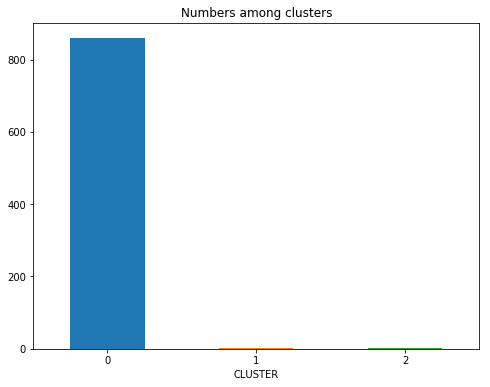

In [32]:
# Count the number for eahc cluster and plot the bar graph
# About 3 line code:
cluster_count = df_cluster.groupby('CLUSTER').count()['TRAFFIC']
print(cluster_count)
cluster_count.plot(kind ='bar',rot= 0,figsize =(8,6),
                 title= 'Numbers among clusters')
plt.show()

           RATE_RRC   RATE_ERAB  RATE_RADIO   HO_INTRA         HO  DROP_RATE  \
CLUSTER                                                                        
0         99.889186   99.981780   99.871076  97.793042  98.127911   0.107021   
1         97.478333   99.082333   96.578000  98.459333  97.538667   1.408333   
2        100.000000  100.000000  100.000000   0.000000   0.000000   0.000000   

         DL_PRB_AVG_RATE   MAX_USERS  UL_INTERFERENCE_AVG_PRB     TRAFFIC  
CLUSTER                                                                    
0              25.850168   65.443539              -116.031432  402.756527  
1              26.342667  159.333333              -115.666667  681.251000  
2               2.449000    8.500000              -120.000000    2.224000  


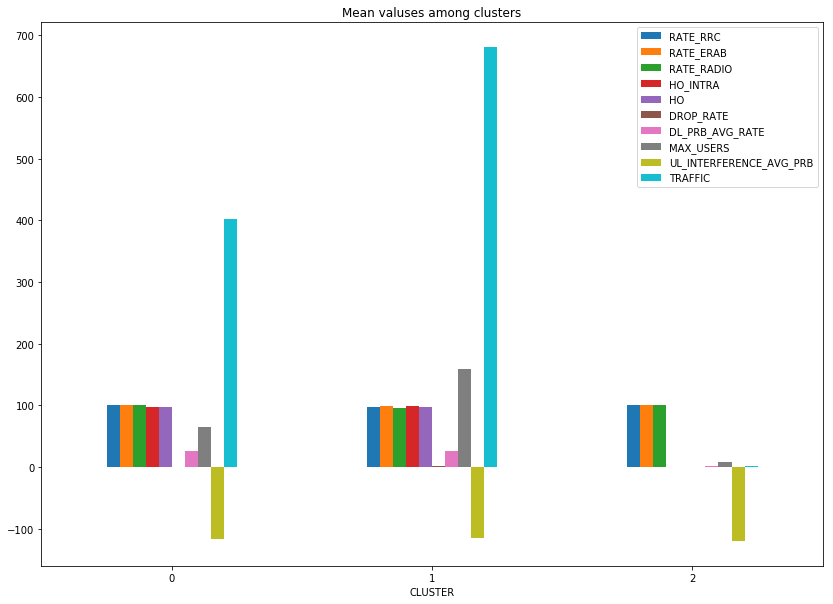

In [33]:
# Calculate the mean statistics for different clusters and plot it as a side-by-side bar graph
# About 3 line code:
cluster_mean = df_cluster.groupby('CLUSTER').mean()
print(cluster_mean)
cluster_mean.plot(kind ='bar',rot= 0,figsize =(14,10),
                 title= 'Mean valuses among clusters')
plt.show()

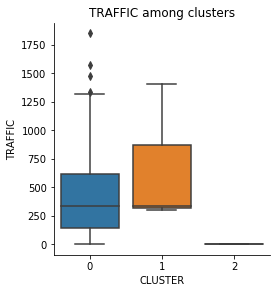

In [34]:
# import seaborn and plot the box-plot of TRAFFIC among clusters
# About 4 line code:
import seaborn as sns
sns.factorplot(x='CLUSTER', y='TRAFFIC', kind='box',
               data=df_cluster)
plt.title('TRAFFIC among clusters')
plt.show()

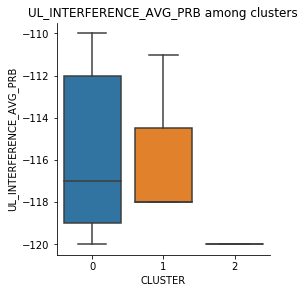

In [35]:
# Plot the box-plot of UL_INTERFERENCE_AVG_PRB among clusters
# About 3 line code:
sns.factorplot(x='CLUSTER', y='UL_INTERFERENCE_AVG_PRB', kind='box',
               data=df_cluster)
plt.title('UL_INTERFERENCE_AVG_PRB among clusters')
plt.show()

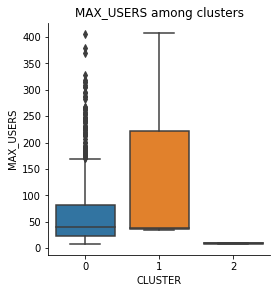

In [36]:
# Plot the box-plot of MAX_USERS among clusters
# About 3 line code:
sns.factorplot(x='CLUSTER', y='MAX_USERS', kind='box',
               data=df_cluster)
plt.title('MAX_USERS among clusters')
plt.show()

# Save the clustring results into file
1. Concate the original dataframe  with clustring labels
2. Store the result into a csv file 

In [37]:
# Concate the original dataframe  with clustring labels and show the head of it 
# About 2 line code:
cell_cluster = pd.concat([data[['ENODEB','CELL']],df_cluster],axis=1)
cell_cluster.head()

,ENODEB,CELL,RATE_RRC,RATE_ERAB,RATE_RADIO,HO_INTRA,HO,DROP_RATE,DL_PRB_AVG_RATE,MAX_USERS,UL_INTERFERENCE_AVG_PRB,TRAFFIC,CLUSTER
0,EEIF,4485,99.673,100.000,99.673,89.583,92.248,0.342,5.640,13.0,-119.0,66.617,0
1,GBHG,6176,100.000,100.000,100.000,100.000,100.000,0.000,6.992,27.0,-119.0,79.185,0
2,GAGC,9092,99.810,99.878,99.688,100.000,100.000,0.000,8.338,30.0,-119.0,192.942,0
3,EBIB,4181,99.960,99.928,99.888,98.967,98.077,0.134,56.424,184.0,-112.0,724.263,0
4,HFBE,7514,100.000,100.000,100.000,98.585,98.634,0.137,25.609,114.0,-112.0,379.319,0


In [38]:
# Store the result into a csv file named cell_clustering_analysis_201711
# About 1 line code:
cell_cluster.to_csv('./datasets/cell_cluster_with_muptiple_models.csv', sep=',')